# Dyskretna Transformacja Fouriera

In [1]:
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt

## Implementacja

In [2]:
def DFT(x):
    n = x.shape[0]
    F = np.array([[np.exp(-2*np.pi*1j*i*k/n) for i in range(n)] for k in range(n)], dtype=np.complex_)
    return F@x

In [3]:
def IDFT(y):
    n = y.shape[0]
    F = np.array([[np.exp(-2*np.pi*1j*i*k/n) for i in range(n)]
                  for k in range(n)], dtype=np.complex_)
    return (F@y.conj()).conj()/n   

In [4]:
def get_signal(N):
    x = np.arange(N)
    return np.sin(2*np.pi*x/float(N))

In [8]:
def Cooley_Tukey(x):
    n = x.shape[0]
    if n<=8:
        return DFT(x)
    else:
        x_e = Cooley_Tukey(x[::2])
        x_o = Cooley_Tukey(x[1::2])
        f = np.exp(-2j * np.pi * np.arange(n) / n)
        return np.concatenate([x_e + f[:n//2] * x_o, x_e + f[n//2:]*x_o])

In [12]:
signal128 = get_signal(128)
%timeit y = DFT(signal128)
y = DFT(signal128)
%timeit y_ct = Cooley_Tukey(signal128)
y_ct = Cooley_Tukey(signal128)
%timeit y_lib = fft(signal128)
y_lib = fft(signal128)
print(f'Cooley-Tukey: {np.allclose(y_ct, y_lib)}, Basic: {np.allclose(y, y_lib)}')

29.5 ms ± 916 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.57 ms ± 339 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.59 µs ± 348 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Cooley-Tukey: True, Basic: True


In [13]:
signal512 = get_signal(512)
%timeit y = DFT(signal512)
y = DFT(signal512)
%timeit y_ct = Cooley_Tukey(signal512)
y_ct = Cooley_Tukey(signal512)
%timeit y_lib = fft(signal512)
y_lib = fft(signal512)
print(f'Cooley-Tukey: {np.allclose(y_ct, y_lib)}, Basic: {np.allclose(y, y_lib)}')

525 ms ± 89.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.93 ms ± 150 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.8 µs ± 465 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Cooley-Tukey: True, Basic: True


In [14]:
signal2048 = get_signal(2048)
%timeit y = DFT(signal2048)
y = DFT(signal2048)
%timeit y_ct = Cooley_Tukey(signal2048)
y_ct = Cooley_Tukey(signal2048)
%timeit y_lib = fft(signal2048)
y_lib = fft(signal2048)
print(f'Cooley-Tukey: {np.allclose(y_ct, y_lib)}, Basic: {np.allclose(y, y_lib)}')

7.6 s ± 395 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
38.6 ms ± 444 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
50.3 µs ± 6.79 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Cooley-Tukey: True, Basic: True


## Wizualizacja

In [15]:
def get_signal_sin(unit_cycles_no, t, sampling_f=128):
    N = unit_cycles_no*sampling_f
    x = np.arange(N)
    return np.sin(2*np.pi*t*x/float(sampling_f))

def get_signal_cos(unit_cycles_no, t, sampling_f=128):
    N = unit_cycles_no*sampling_f
    x = np.arange(N)
    return np.cos(2*np.pi*t*x/float(sampling_f))

def get_combined_signal_sin(unit_cycles_no):
    return get_signal_sin(unit_cycles_no, 2)+get_signal_sin(unit_cycles_no, 5)+get_signal_sin(unit_cycles_no, 10)

def get_combined_signal_cos(unit_cycles_no):
    return get_signal_cos(unit_cycles_no, 2)+get_signal_cos(unit_cycles_no, 5)+get_signal_cos(unit_cycles_no, 10)

def get_concat_signal_sin(unit_cycles_no):
    return np.concatenate((get_signal_sin(unit_cycles_no//4, 1),get_signal_sin(unit_cycles_no//4, 2),
                           get_signal_sin(unit_cycles_no//4, 5),get_signal_sin(unit_cycles_no//4, 10)))

def get_concat_signal_cos(unit_cycles_no):
    return np.concatenate((get_signal_cos(unit_cycles_no//4, 1),get_signal_cos(unit_cycles_no//4, 2),
                           get_signal_cos(unit_cycles_no//4, 5),get_signal_cos(unit_cycles_no//4, 10)))

def plot_signal(y, sampling_f=128):
    N = y.shape[0]
    x = 2*np.pi*np.arange(N)/float(sampling_f)
    fig, axs = plt.subplots(1, figsize=(8,4))
    axs.plot(x, y)
    
def plot_fft(y, sampling_f=128):
    N = y.shape[0]
    x = sampling_f*np.arange(N)/float(N)
    fig, axs = plt.subplots(2, figsize=(16,8))
    axs[0].plot(x[:N//2], np.real(y)[:N//2])
    axs[1].plot(x[:N//2], np.imag(y)[:N//2])
    axs[0].set_title("Real part")    
    axs[1].set_title("Imaginary part")

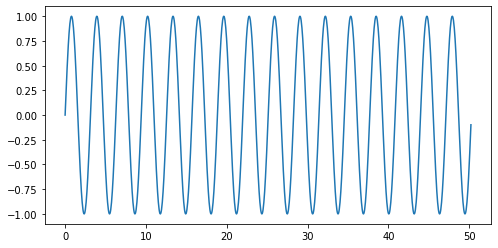

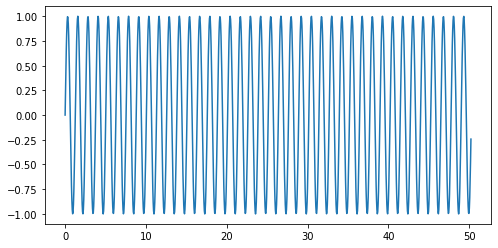

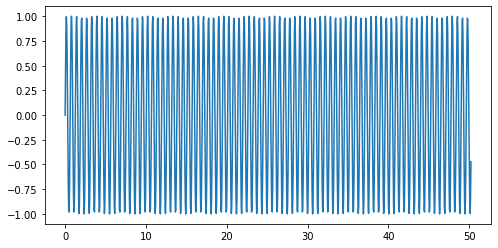

In [16]:
y1 = get_signal_sin(8, 2)
y2 = get_signal_sin(8, 5)
y3 = get_signal_sin(8, 10)
plot_signal(y1)
plot_signal(y2)
plot_signal(y3)

Na podstawie poniższych wizualizacji można stwierdzić, że sygnały sinusoidalne są lapiej reprezentowane przez część urojoną wyniku, natomiast sygnały kosinusoidalne przez część rzeczywistą. Ma to prawdopodobnie związek z faktem, że w postaci trygonometrycznej liczby zespolonej część urojona jest reprezentowana przez sinus, a rzeczywista przez kosinus.

### Dodanie sygnałów

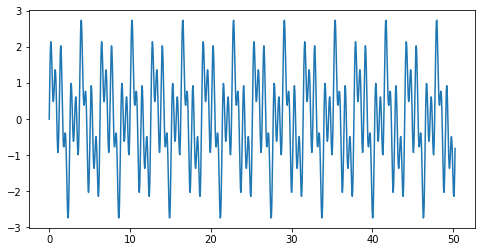

In [17]:
y_sin = get_combined_signal_sin(8)
plot_signal(y_sin)

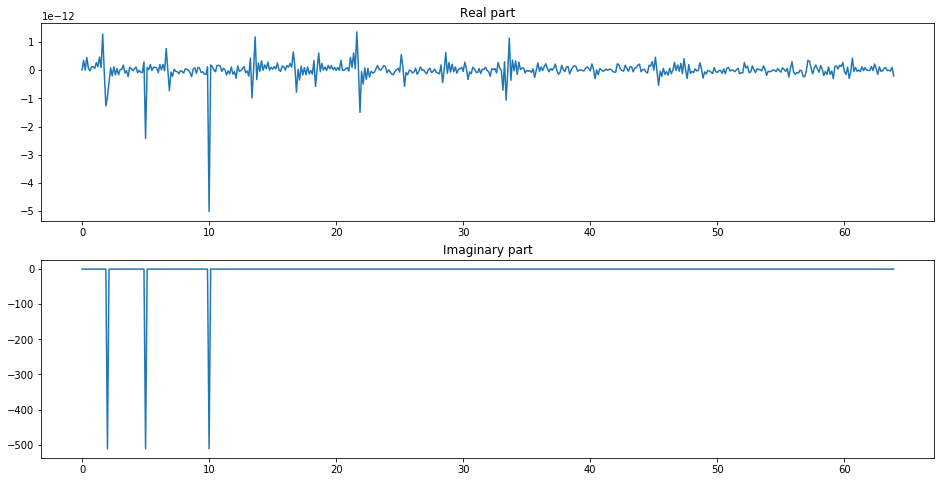

In [18]:
fft_out = Cooley_Tukey(y_sin)
plot_fft(fft_out)

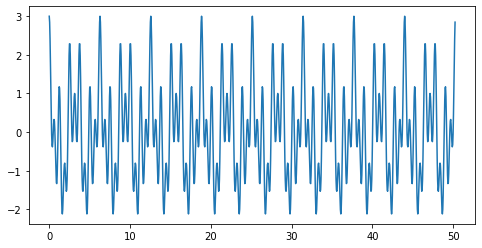

In [19]:
y_cos = get_combined_signal_cos(8)
plot_signal(y_cos)

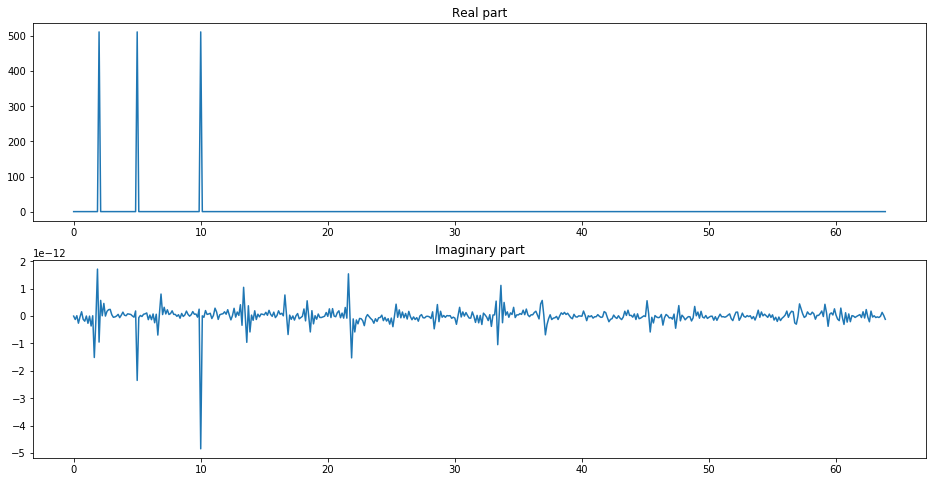

In [20]:
fft_out = Cooley_Tukey(y_cos)
plot_fft(fft_out)

### Konkatenacja sygnałów

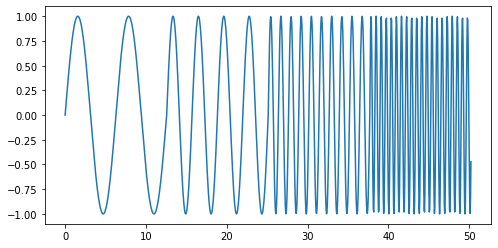

In [21]:
y_c_sin = get_concat_signal_sin(8)
plot_signal(y_c_sin)

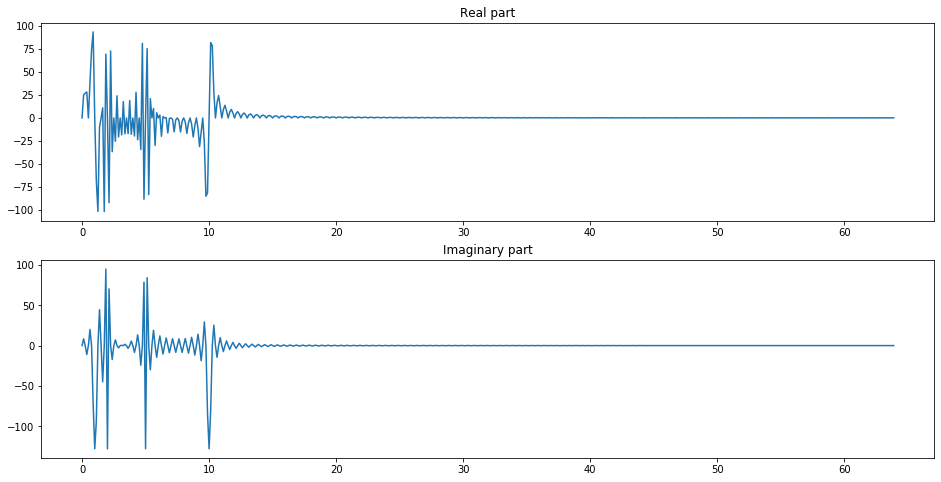

In [22]:
fft_out = Cooley_Tukey(y_c_sin)
plot_fft(fft_out)

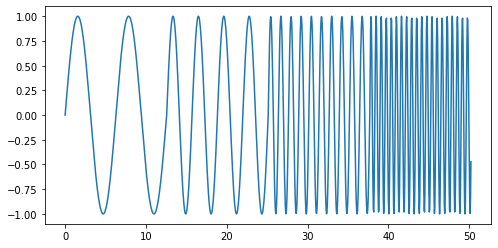

In [23]:
y_c_cos = get_concat_signal_cos(8)
plot_signal(y_c_sin)

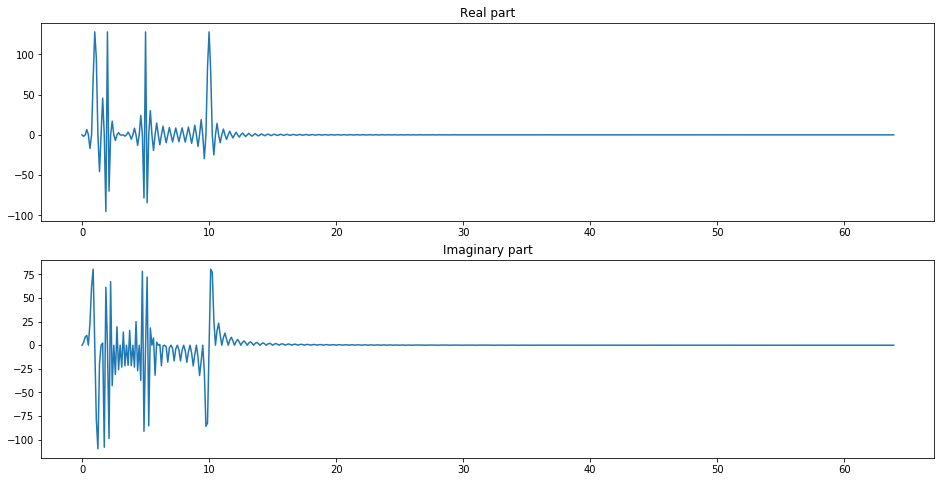

In [24]:
fft_out = Cooley_Tukey(y_c_cos)
plot_fft(fft_out)